# **Regression models on the data of quasar candidates by G. Richards et al., ApJS, 219, 39 (2015)**

**Author: Franciszek Humieja**

In [13]:
import pandas as pd
import matplotlib.pylab as plt

# 1. About the Data

The data I am going to investigate is the real astrophysical catalog of candidates for quasi-stellar objects (QSO or quasars) prepared by G. Richards et al. 2015 ApJS 219 39. This data set contains a catalog of astrophysical objects that are likely to be quasars but lack unambiguous spectroscopic confirmation.

The more detailed description of the analysis and resulting data of Richards et al. is available in [my report of the exploratory data analysis (EDA) of this data set](https://github.com/frank01101/quasar_candidates/blob/main/quasars-report.pdf). Moreover, the PDF report summarizes main results obtained in [my Jupyter notebook with all EDA calculations](https://github.com/frank01101/quasar_candidates/blob/main/quasars_eda.ipynb). The notebook takes the [original data of Richards et al.](https://cdsarc.cds.unistra.fr/ftp/J/ApJS/219/39/) (the file `cand.dat.gz`) and performs EDA, consisting of:
1. data wrangling,
2. data cleaning:
   1. whitespaces removing,
   2. handling duplicates,
   3. handling missing values,
   4. handling outliers,
3. feature engineering:
   1. calculating new features motivated by physics: colors,
   2. calculating polynomials of features,
   3. feature scaling,
   4. one-hot encoding,
4. numerical and visual analysis of main correlations,
5. significance testing of statistical hypotheses.

After performing these steps, the notebook exports the cleaned data as `cand_cleaned.csv` file that is the input data for the regression analysis below.

Let us start with importing the cleaned catalog of quasar candidates.

In [2]:
catalog = pd.read_csv('cand_cleaned.csv', index_col=0)
catalog

,RAdeg,DEdeg,Class,zsp,umag,gmag,rmag,imag,zmag,3.6mag,...,e_z-3.6,e_3.6-4.5,log_u-g,log_g-r,log_r-i,e_log_u-g,e_log_g-r,e_log_r-i,robust,robust_contamin
0,0.000629,35.517841,U,NaN,18.571,18.330,18.197,18.241,18.089,17.119,...,0.033106,0.043139,2.289323,1.290059,1.083837,0.003077,0.003114,0.004074,True,False
1,0.000831,15.197328,U,NaN,22.647,21.808,20.873,20.615,20.326,18.845,...,0.121433,0.104623,2.416402,1.489528,1.181114,0.034162,0.011258,0.012618,True,False
2,0.001527,27.732283,U,NaN,22.052,21.703,21.603,21.550,21.915,20.174,...,0.392868,0.316760,2.312791,1.280934,1.116125,0.036852,0.025557,0.036452,False,False
3,0.001914,9.385637,U,NaN,18.395,18.375,18.299,18.178,18.004,17.888,...,0.046957,0.060828,2.240536,1.274245,1.138153,0.008060,0.010024,0.010132,True,False
4,0.002595,31.328981,U,NaN,19.592,19.431,19.425,19.285,18.907,18.903,...,0.068000,0.100000,2.271783,1.254476,1.144223,0.005552,0.005449,0.007071,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885498,359.999115,28.954735,U,NaN,21.994,21.351,21.391,21.311,20.869,19.902,...,0.181959,0.210874,2.375500,1.241269,1.124930,0.022694,0.015261,0.022988,False,False
885499,359.999115,1.647538,U,NaN,20.256,20.296,19.944,19.722,19.793,18.962,...,0.119004,0.128226,2.227106,1.348592,1.170002,0.013592,0.011378,0.012603,True,False
885500,359.999207,-4.507331,U,NaN,21.573,20.703,20.288,20.144,19.979,20.180,...,0.203443,0.477620,2.422808,1.364815,1.145496,0.016115,0.007261,0.008558,False,False
885501,359.999756,-9.776147,U,NaN,21.366,21.403,21.133,21.157,21.024,19.076,...,0.303058,0.198565,2.227779,1.327075,1.090580,0.023125,0.017077,0.029457,False,False


In [3]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885449 entries, 0 to 885502
Data columns (total 81 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RAdeg            885449 non-null  float64
 1   DEdeg            885449 non-null  float64
 2   Class            885449 non-null  object 
 3   zsp              151350 non-null  float64
 4   umag             885449 non-null  float64
 5   gmag             885449 non-null  float64
 6   rmag             885449 non-null  float64
 7   imag             885449 non-null  float64
 8   zmag             885449 non-null  float64
 9   3.6mag           885449 non-null  float64
 10  4.5mag           885449 non-null  float64
 11  e_umag           885449 non-null  float64
 12  e_gmag           885449 non-null  float64
 13  e_rmag           885449 non-null  float64
 14  e_imag           885449 non-null  float64
 15  e_zmag           885449 non-null  float64
 16  e_3.6mag         885449 non-null  float64
 

The most important features are:
* `RAdeg` and `DEdeg` – the celestial coordinates (right ascension and declination) of an object in degrees.
* `Class` – the spectral classification result of an object. If the spectral analysis was available, the object was classified either as quasar (_QSO_), galaxy (_GALAXY_), star (_STAR_), compact emission line galaxy (_CELG_) or hard to interpret (_??_). Otherwise, if no spectrum is provided, the object is unclassified (_U_).
* `zsp` – spectroscopic redshift for the objects with spectrum available.
* `umag`, ..., `zmag` – _SDSS_ magnitudes in optical and near-infrared _u, g, r, i_ and _z_ passbands.
* `3.6mag` and `4.5mag` – _Spitzer_ magnitudes in mid-infrared _ch1_ and _ch2_ passbands (having effective wavelength midpoints at $3.6\,\mathrm{\mu m}$ and $4.5\,\mathrm{\mu m}$, respectively).
* `Ymag`, ..., `Kmag` – _UKIDSS_ and _VHS_ magnitudes in near-infrared _Y, J, H_ and _K_ passbands. Provided to only a fraction of objects.
* `FUV` and `NUV` – _GALEX_ magnitudes in ultra-violet passbands. Provided to only a fraction of objects.
* Columns starting with `e_` – standard errors (uncertainties) of the corresponding values.
* `gisig` – an indicator of distance (in units of confidence level) from the average curve in a regression-like problem of finding photometric redshift.
* `zphO` – the best estimate for photometric redshift calculated through regression trained with a relationship between spectroscopic redshift and _ugriz_ magnitudes. 
  * `b_zphO` – the minimum estimate for photometric redshift (_ugriz_).
  * `B_zphO` – the maximum estimate for photometric redshift (_ugriz_).
  * `zphOP` – a probability of the true redshift to be between minimum and maximum estimates of photometric redshift (_ugriz_).
* `zphIR` – similar to `zphO` but trained using _ugrizJHK_ magnitudes. Available only for those sources with _JHK_ photometry performed.
* `pm` – proper motion (speed of motion in the sky) of an object in milliarcseconds per year.
* `u-g`, ..., `3.6-4.5` – colors, which are differences between magnitudes in different passbands.
* `robust` – if an object is “robust”, according to specifications given by Richards et al. (2015).
* `robust_contamin` – “robust” objects that were spectroscopically classified not to be quasars (contaminants).

The classification conditions for the “robust” sources are as follows (Richards et al., 2015):

1. `zphOP` $ > 0.8 $ and
2. $abs($ `gisig` $) \leq 0.95 $.

Moreover, for high-redshift objects, $3.5<z<5$, the additional conditions are:

3. `NUV` and `FUV` are _NA_ (nondetections in _GALEX_ – real high-$z$ quasars are unlikely to be detected) and
4. `imag` $< 22$ (point-like objects of the 22nd or greated magnitude have a significant probality of being galaxies at these redshifts).

# 2. Objectives

The main objective of this analysis is to investigate correlations between color variables and redshift for the purpose of predicting unknown redshift from easy-to-obtain color information by training various linear regression models. A successful model like this would be very helpful in astrophysics because many objects lack spectroscopic observations and, consequently, information of their redshift.

The variables of our interest are _colors_: `u-g`, ..., `3.6-4.5`, along with their uncertainties `e_u-g`, ..., `e_3.6-4.5`, and _spectroscopic redshift_, `zsp`, which has been measured for $151350$ objects out of all $885449$ candidates. Moreover, all the objects have _photometric redshift_, `zphO` (and `zphIR` for $171831$ objects), calculated independently by authors of the cited paper from the relationship between magnitudes and spectroscopic redshift. This variable can be a test for the values of redshift we will derive from our regression problems, especially for the robust subset of data for which the spectroscopic redshift estimate is believed to be more reliable.

# 3. Linear Regression Models

## 3.1. Feature engineering

The preceding notebook with EDA of this dataset showed that the color variables had skewed distributions, but it lacked the boxcox transformation to lessen the skewness. Let us perform this short feature engineering now.

First of all, we will define a bunch of useful masks.

In [8]:
colors = pd.Index(['u-g', 'g-r', 'r-i', 'i-z', 'z-3.6', '3.6-4.5'])
e_colors = pd.Index(['e_u-g', 'e_g-r', 'e_r-i', 'e_i-z', 'e_z-3.6', 'e_3.6-4.5'])

In [47]:
spectro = catalog['zsp'].notna()
low_z = (catalog['zsp']>=0.0) & (catalog['zsp']<2.2)
mid_z = (catalog['zsp']>=2.2) & (catalog['zsp']<3.5)
high_z = (catalog['zsp']>=3.5) & (catalog['zsp']<5.0)

In [25]:
robust = catalog['robust']

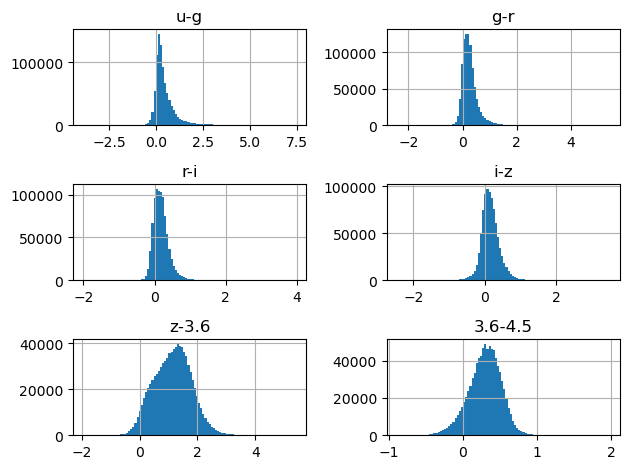

In [16]:
catalog.hist(column=colors, bins=100)
plt.tight_layout()

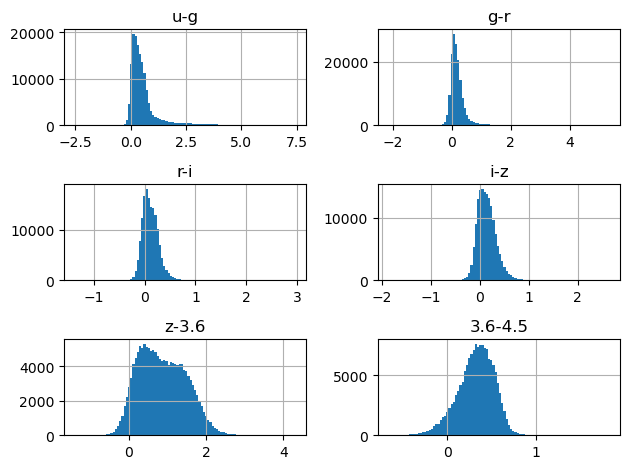

In [48]:
catalog[spectro].hist(column=colors, bins=100)
plt.tight_layout()

In [27]:
catalog.skew(numeric_only=True)[colors]

u-g        2.728076
g-r        2.881182
r-i        1.628112
i-z        0.393644
z-3.6      0.107150
3.6-4.5   -0.261799
dtype: float64

In [49]:
catalog[spectro].skew(numeric_only=True)[colors]

u-g        3.014246
g-r        3.917629
r-i        1.686553
i-z        0.470460
z-3.6      0.321496
3.6-4.5   -0.439046
dtype: float64